#**Comment les choix des prénoms en France reflètent-ils des évolutions des dynamiques linguistiques et culturelles à travers les époques ?**


DUMONT Louison

# 1. Introduction

Les choix des prénoms en France offrent une fenêtre sur l'évolution des dynamiques linguistiques et culturelles au fil des siècles. Chaque prénom est empreinte d'une époque, reflétant des tendances sociales, des influences religieuses ou encore des phénomènes de mode. Les mutations des pratiques onomastiques traduisent des transformations profondes de la société française. Ainsi, nous nous interrogerons sur la manière dont le temps donc les phénomènes culturels façonnent les prénoms en France et sur ce qu'elles révèlent de l'évolution des phonèmes.

Pour cette étude, nous utiliserons un jeu de données qui contient les prénoms attribués aux enfants en France entre 1900 et 2022 et les effectifs par sexes associés à chaque prénom.
https://www.insee.fr/fr/statistiques/7633685.

**Description des données** :

1.   'Sexe' représente le sexe de la personne qui a reçu le prénom ('1' pour 'garçon' et '2' pour 'fille')
2.   'preusuel' désigne le prénom
3.   'annais' signifie l'année de naissance
4.   'nombre' correspond l'effectif annuel à recevoir ce prénom



##2. Importation de bibliothèques

In [3]:
!pip install phonemizer

In [1]:
# Installer espeak
!apt-get install espeak

# Réinstaller phonemizer
!pip install phonemizer --force-reinstall

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
espeak is already the newest version (1.48.15+dfsg-3).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
  Using cached phonemizer-3.3.0-py3-none-any.whl.metadata (48 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached segments-2.2.1-py2.py3-none-any.whl.metadata (3.3 kB)
  Using cached attrs-24.3.0-py3-none-any.whl.metadata (11 kB)
  Using cached dlinfo-2.0.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached clldutils-3.24.0-py2.py3-none-any.whl.metadata (3.0 kB)
  Using cached csvw-3.5.1-py2.py3-none-any.whl.metadata (10 kB)
  Using cached regex-2024.11.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB

In [6]:
!pip install epitran

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.1/184.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 580.9/580.9 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 12.2 MB/s eta 0:00:00
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10744 sha256=4ff8061e860456346a33e6c61bb3b8f14451b2906cb3e6c4fa307ca4265f212f
  Stored in directory: /root/.cache/pip/wheels/ec/03/6f/d2e0162d94c0d451556fa43dd4d5531457245c34a36b41ef4a
Successfully built unicodecsv


In [30]:
# Charger les bibliothèthes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import networkx as nx
from phonemizer import phonemize
import epitran
from scipy.stats import chi2_contingency

from google.colab import files

## 3. Importation de données

In [5]:
uploaded = files.upload() # Charger le fichier

Saving nat2022.csv to nat2022.csv


In [4]:
df = pd.read_csv("nat2022.csv", sep=';', encoding='utf-8')  # Lire le fichier
display(df)

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1249
1,1,_PRENOMS_RARES,1901,1342
2,1,_PRENOMS_RARES,1902,1330
3,1,_PRENOMS_RARES,1903,1286
4,1,_PRENOMS_RARES,1904,1430
...,...,...,...,...
703002,2,ZYNEB,2019,7
703003,2,ZYNEB,2020,8
703004,2,ZYNEB,2021,6
703005,2,ZYNEB,2022,4


## 4. Manipulation de données

In [37]:
# Supprimer les lignes avec des NaN
df = df.dropna()

In [38]:
# Supprimer les lignes où 'annais' est 'XXXX' ou 'preusuel' est '_PRENOMS_RARES'
df = df[(df['annais'] != 'XXXX') & (df['preusuel'] != '_PRENOMS_RARES')]

In [46]:
# Convertir 'annais' et 'nombre' en entier
df['annais'] = pd.to_numeric(df['annais'], errors='coerce')
df['nombre'] = pd.to_numeric(df['nombre'], errors='coerce')  # Pareil pour nombre

# Convertir à nouveau en entier après remplacement
df['annais'] = df['annais'].astype(int)
df['nombre'] = df['nombre'].astype(int)
df['preusuel'] = df['preusuel'].fillna('').astype(str)

# Vérifier les types après conversion
print(df.dtypes)

sexe              int64
preusuel         object
annais            int64
nombre            int64
phoneme          object
first_phoneme    object
period            int64
dtype: object


In [28]:
# Appliquer la transcription phonétique sous forme de liste à la colonne 'preusuel'
df['phoneme'] = df['preusuel'].apply(lambda x: epi.trans_list(x))

# Créer des périodes de 20 ans
df['period'] = (df['annais'] // 20) * 20

# Afficher les premières lignes du DataFrame
print(df.head())

     sexe preusuel  annais  nombre        phoneme first_phoneme  period
123     1        A    1980       3            [a]             a    1980
124     1        A    1998       3            [a]             a    1980
126     1    AADAM    2009       4  [a, a, d, ɑ̃]             a    2000
127     1    AADAM    2014       3  [a, a, d, ɑ̃]             a    2000
128     1    AADAM    2015       3  [a, a, d, ɑ̃]             a    2000


## 5. Visualisation de données

###5.1 Visualiser la fréquence des phonèmes

In [29]:
# Grouper par période et phonème pour obtenir la fréquence des phonèmes dans chaque période
phoneme_freq_by_period = df.groupby(['period', 'first_phoneme']).size().unstack(fill_value=0)

# Afficher la fréquence des phonèmes dans chaque période
print(phoneme_freq_by_period)

first_phoneme      a   ä     b     d     e     f      i    j      k      l  \
period                                                                        
1900            3617    0  1399  1027    46  2027   1279    3   1688   2199   
1920            3873    0  1687  1329    92  2429   1595   26   2137   2938   
1940            3914    0  1779  1810   146  2494   1733    8   2485   3120   
1960            8437    0  2728  3225   254  4399   3256   43   5007   4758   
1980           13776    1  4229  5162   468  5574   6582  137   8725   8860   
2000           24430  124  5967  9765  2019  6368  13639  535  20275  20804   
2020            4504   55   878  1634   686   891   2445  123   3383   3401   

first_phoneme  ...   ɔ̃     ə     ɛ   ɛ̃     ɡ   ɥ   ɲ     ʀ     ʃ      ʒ  
period         ...                                                         
1900           ...    0  1311  1808   41  1085   0   0  1829   371   2748  
1920           ...    0  1276  1936   62  1378   0   0  2474

### 5.2 Les prénoms populaires

In [60]:
# Trouver les prénoms les plus populaires
prenoms_populaires = df.groupby('preusuel')['nombre'].sum().sort_values(ascending=False)

In [61]:
# Fonction pour trouver le prénom le plus populaire par période
def prenom_populaire_par_periode(df, annee_debut, annee_fin, intervalle=20):
    # Créer une liste des périodes (de 20 ans)
    periodes = list(range(annee_debut, annee_fin, intervalle))

    # Dictionnaire pour stocker le prénom le plus populaire pour chaque période
    prenoms_populaires = {}

    for periode_debut in periodes:
        periode_fin = periode_debut + intervalle - 1
        # Filtrer les données pour la période
        df_periode = df[(df['annais'] >= periode_debut) & (df['annais'] <= periode_fin)]

        # Trouver le prénom le plus populaire
        if not df_periode.empty:
            prenom_populaire = df_periode.groupby('preusuel')['nombre'].sum().idxmax()
            nombre_populaire = df_periode.groupby('preusuel')['nombre'].sum().max()
            prenoms_populaires[f"{periode_debut}-{periode_fin}"] = (prenom_populaire, nombre_populaire)

    return prenoms_populaires

# Récupérer les prénoms populaires pour chaque période
prenom_populaire_par_periode_1900_2020 = prenom_populaire_par_periode(df, 1900, 2020)

###5.3 Graphiques

<ipython-input-72-7e498a02c123>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_prenoms.index, y=top_10_prenoms.values, palette="pastel", ax=axs[1])
<ipython-input-72-7e498a02c123>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=periodes, y=nombres, palette="pastel", ax=axs[2])


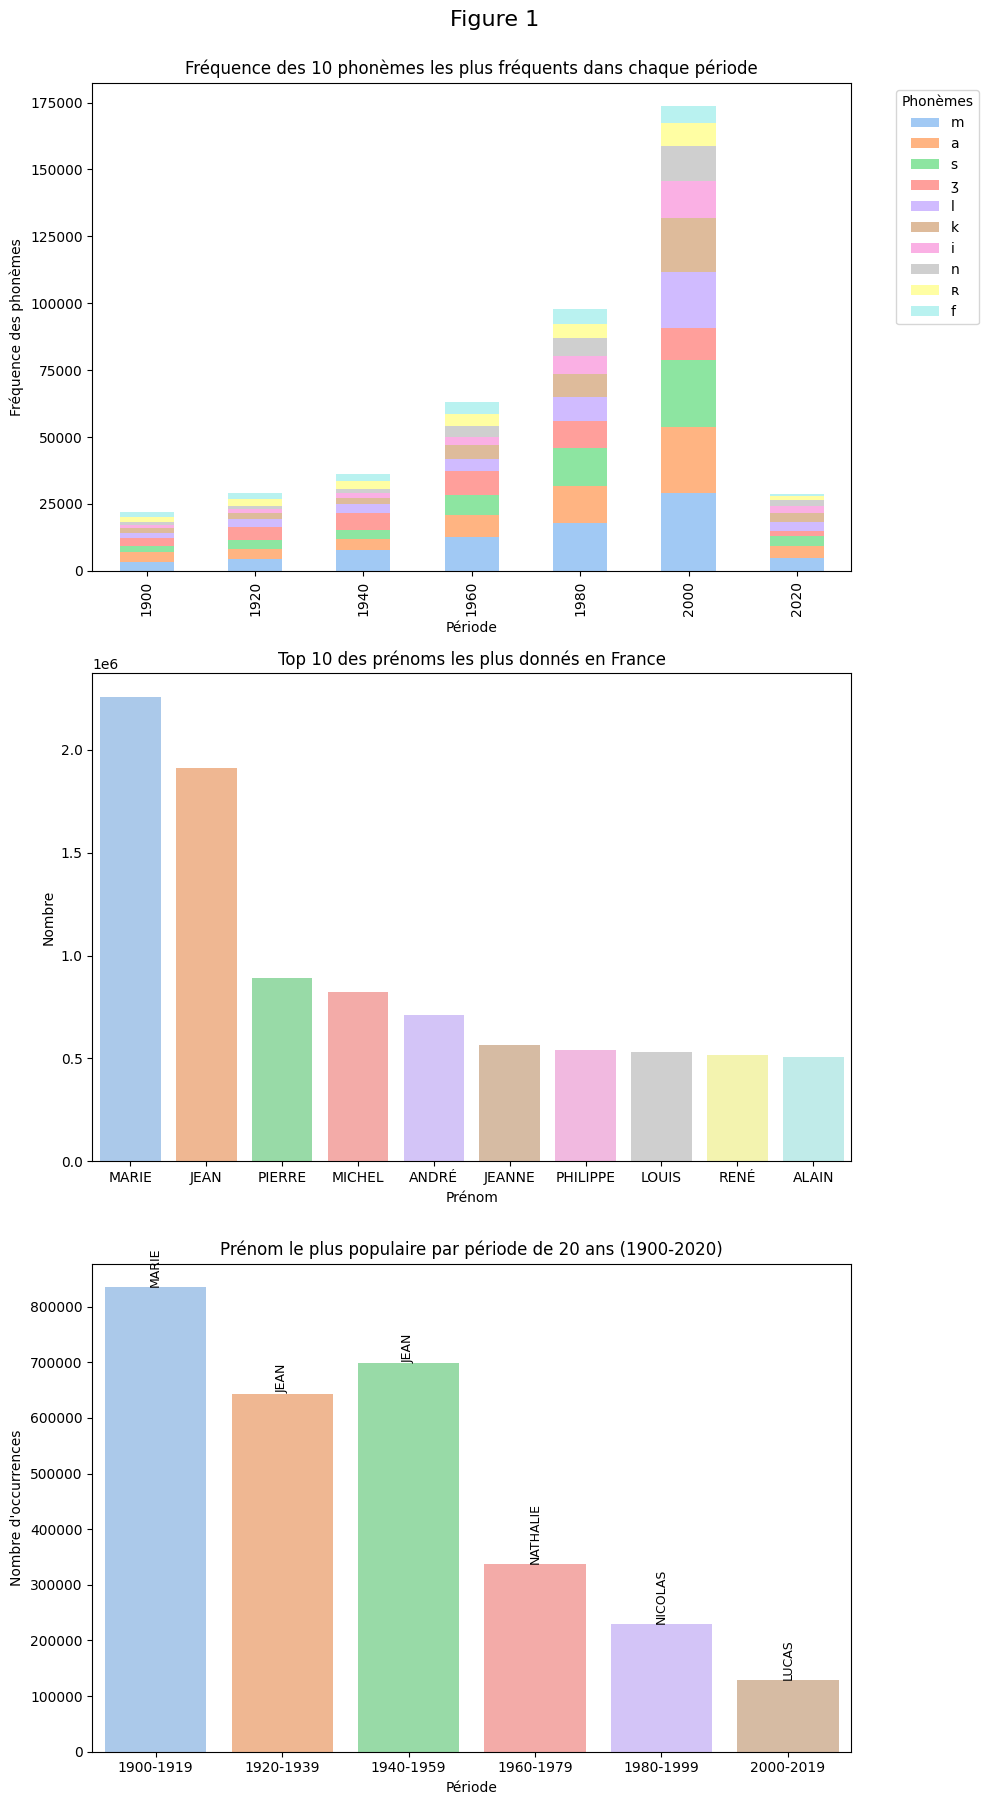

In [72]:
# Créer une figure avec 3 sous-graphes (3 lignes, 1 colonne)
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Palette de couleurs pastel
palette = sns.color_palette("pastel", n_colors=10)  # Palette pastel avec 10 couleurs

# Ajouter un grand titre pour la figure
fig.suptitle("Figure 1", fontsize=16, ha='center', y=1)

# 1er graphique : Fréquence des 10 phonèmes les plus fréquents
top_10_phonemes = phoneme_freq_by_period.sum().sort_values(ascending=False).head(10).index  # Sélectionner les 10 phonèmes les plus fréquents
phoneme_freq_top_10 = phoneme_freq_by_period[top_10_phonemes]  # Filtrer les données pour garder uniquement ces 10 phonèmes

# Créer le graphique à barres empilées pour la fréquence des phonèmes
phoneme_freq_top_10.plot(kind='bar', stacked=True, ax=axs[0], color=palette)

axs[0].set_title("Fréquence des 10 phonèmes les plus fréquents dans chaque période")
axs[0].set_xlabel("Période")
axs[0].set_ylabel("Fréquence des phonèmes")
axs[0].legend(title="Phonèmes", bbox_to_anchor=(1.05, 1), loc='upper left')

# 2e graphique : Top 10 des prénoms les plus donnés en France
sns.barplot(x=top_10_prenoms.index, y=top_10_prenoms.values, palette="pastel", ax=axs[1])
axs[1].set_title("Top 10 des prénoms les plus donnés en France")
axs[1].set_xlabel("Prénom")
axs[1].set_ylabel("Nombre")

# 3e graphique : Prénom le plus populaire par période de 20 ans (1900-2020)
sns.barplot(x=periodes, y=nombres, palette="pastel", ax=axs[2])
axs[2].set_xlabel("Période")
axs[2].set_ylabel("Nombre d'occurrences")
axs[2].set_title("Prénom le plus populaire par période de 20 ans (1900-2020)")

# Ajouter des annotations pour chaque barre dans le 3e graphique, en indiquant uniquement le prénom
for i, prenom in enumerate(prenoms):
    axs[2].text(i, nombres[i] + 500, prenom, ha='center', va='bottom', rotation=90, fontsize=9)

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

In [62]:
# Observer si des phonèmes ont disparu ou disparu
# Extraire les phonèmes les plus fréquents pour 1900 et 2020
phonemes_1900 = phoneme_by_period.loc[1900]
phonemes_2020 = phoneme_by_period.loc[2020]

# Compter les phonèmes pour chaque période
phoneme_counts_1900 = Counter(phonemes_1900)
phoneme_counts_2020 = Counter(phonemes_2020)

# Extraire les ensembles de phonèmes présents en 1900 et 2020
phonemes_1900_set = set(phoneme_counts_1900.keys())
phonemes_2020_set = set(phoneme_counts_2020.keys())

# Identifier les phonèmes disparus et apparus
disappeared_phonemes = phonemes_1900_set - phonemes_2020_set
appeared_phonemes = phonemes_2020_set - phonemes_1900_set

# Afficher les résultats
print(f"Phonèmes disparus entre 1900 et 2020 : {disappeared_phonemes}")
print(f"Phonèmes apparus entre 1900 et 2020 : {appeared_phonemes}")

Phonèmes disparus entre 1900 et 2020 : set()
Phonèmes apparus entre 1900 et 2020 : {'ü', "'", 'ÿ', 'ö', '̈', 'ŋ'}


Nous voyons qu'aucun phonème n'a réellement disparu en l'espace de 120 ans mais plusieurs sont apparus. Ceci peut-être l'effet d'influence de langues ou de nouvelles tendances sociales ou culturelles.

##6. Analyse

In [31]:
# Appliquer le test de chi-carré pour tester l'indépendance entre les périodes et les phonèmes
chi2_stat, p_value, dof, expected = chi2_contingency(phoneme_freq_by_period)

# Afficher les résultats
print(f"Statistique du chi-carré : {chi2_stat}")
print(f"p-valeur : {p_value}")

Statistique du chi-carré : 36590.21270455695
p-valeur : 0.0


Étant donné que la p-valeur est bien inférieure au seuil habituel de 0,05, nous pouvons dire que les périodes et les phonèmes sont dépendants. Cela signifie que la distribution des phonèmes varie selon les périodes étudiées.

##7. Conclusion

L'étude démontre que l'évolution des phonèmes dans les prénoms français entre 1900 et 2020 n'est pas aléatoire, mais suit des tendances liées à des évolutions temporelles, des changements sociétaux et des influences extérieures. Le test de Chi-carré confirme que les périodes et les phonèmes sont interdépendants, soulignant l'impact de l'évolution culturelle et linguistique sur les choix des prénoms en France au cours du XXe et XXIe siècle.

Cependant, il serait intéressant de poursuivre cette étude en analysant plus précisément commet sont introduits les nouveaux prénoms du paysage français.